# Импорты

In [44]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Датасет

In [50]:
with open("./data/contextual_dataset.json", "r", encoding="utf-8") as f:
    dataset = json.load(f)

In [51]:
df = pd.DataFrame(dataset)
df.shape

(13152, 4)

# Фильтрация

### Фильтрация неуникальных примеров

In [ ]:
unique_df = df.drop_duplicates(subset=["description_chunk"], keep=False).reset_index(drop=True)
unique_df

,description_chunk,topic,date,title
0,Российские отели работающие по системе всё вкл...,другое,2024-10,None
1,Компания Самолет (SMLT) ожидает рекордных прод...,акции,2023-01,None
2,Цены на нефть останутся высокими в долгосрочно...,нефть,2024-12,None
3,Центральный банк установил регламент для прода...,другое,2022-08,None
4,Выпуск Газпром Капитала привлекателен для инве...,облигации,2021-03,None
...,...,...,...,...
13089,"Курс евро вырос до 100,559 рубля на фоне укреп...",другое,2024-08,False
13090,Общие онлайн-продажи компании достигли 73% от ...,другое,2024-12,False
13091,"В июле прибыль составила 327 млрд рублей, что ...",другое,2023-08,False
13092,"Акции компании Татнефть выросли на 5,5% благод...",акции,2022-06,False


### Фильтрация по длине (убираем все примеры строк меньше 100 символов)

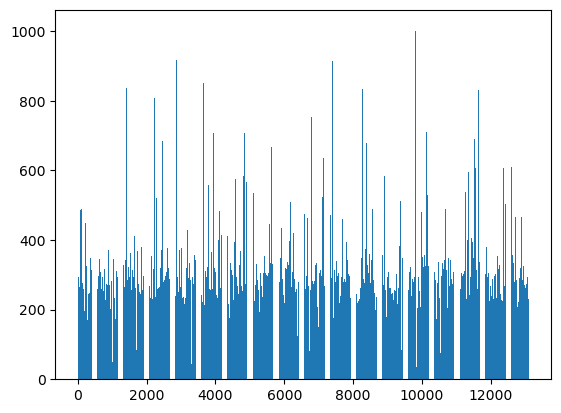

In [53]:
# обоснование зачем чистить по длине
plt.bar(range(1, len(unique_df["description_chunk"]) + 1), list(map(len, unique_df["description_chunk"])));

In [55]:
filtered_df = unique_df[unique_df['description_chunk'].apply(lambda x: len(x) >= 100)]
filtered_df

,description_chunk,topic,date,title
0,Российские отели работающие по системе всё вкл...,другое,2024-10,None
1,Компания Самолет (SMLT) ожидает рекордных прод...,акции,2023-01,None
2,Цены на нефть останутся высокими в долгосрочно...,нефть,2024-12,None
3,Центральный банк установил регламент для прода...,другое,2022-08,None
4,Выпуск Газпром Капитала привлекателен для инве...,облигации,2021-03,None
...,...,...,...,...
13089,"Курс евро вырос до 100,559 рубля на фоне укреп...",другое,2024-08,False
13090,Общие онлайн-продажи компании достигли 73% от ...,другое,2024-12,False
13091,"В июле прибыль составила 327 млрд рублей, что ...",другое,2023-08,False
13092,"Акции компании Татнефть выросли на 5,5% благод...",акции,2022-06,False


In [62]:
filtered_dataset = []
for row in filtered_df.iterrows():
    filtered_dataset.append(dict(row[1]))

# Сохранение датасета

In [63]:
with open("./data/contextual_dataset_v2.json", "w", encoding="utf-8") as f:
    json.dump(filtered_dataset, f, ensure_ascii=False)